In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#email_opened_table.csv
#link_clicked_table.csv
#email_table.csv
open = pd. read_csv('email_opened_table.csv')
click = pd. read_csv('link_clicked_table.csv')
email = pd. read_csv('email_table.csv')

In [28]:
open 

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034
...,...
10340,990213
10341,918210
10342,200299
10343,211104


In [29]:
open['opened'] = 1

In [30]:
click

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561
...,...
2114,873162
2115,435454
2116,206772
2117,742967


In [31]:
click["clicked"] = 1

In [32]:
df1= pd.merge(open, click, on = 'email_id', how = 'outer')
df= pd.merge(df1, email, on = 'email_id', how = 'outer')

In [33]:
df

,email_id,opened,clicked,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,8,NaN,NaN,short_email,generic,9,Thursday,US,3
1,33,NaN,NaN,long_email,personalized,6,Monday,US,0
2,46,NaN,NaN,short_email,generic,14,Tuesday,US,3
3,49,1.0,NaN,long_email,personalized,11,Thursday,US,10
4,65,NaN,NaN,short_email,generic,8,Wednesday,UK,3
...,...,...,...,...,...,...,...,...,...
99995,999969,NaN,NaN,short_email,generic,21,Thursday,US,0
99996,999972,NaN,NaN,long_email,personalized,6,Tuesday,US,5
99997,999976,NaN,NaN,long_email,personalized,5,Wednesday,UK,0
99998,999980,NaN,NaN,long_email,generic,10,Thursday,FR,4


Replacing NaN values with 0

In [34]:
df['opened'] = df['opened'].fillna(0).astype(int)
df['clicked'] = df['clicked'].fillna(0).astype(int)
df

,email_id,opened,clicked,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,8,0,0,short_email,generic,9,Thursday,US,3
1,33,0,0,long_email,personalized,6,Monday,US,0
2,46,0,0,short_email,generic,14,Tuesday,US,3
3,49,1,0,long_email,personalized,11,Thursday,US,10
4,65,0,0,short_email,generic,8,Wednesday,UK,3
...,...,...,...,...,...,...,...,...,...
99995,999969,0,0,short_email,generic,21,Thursday,US,0
99996,999972,0,0,long_email,personalized,6,Tuesday,US,5
99997,999976,0,0,long_email,personalized,5,Wednesday,UK,0
99998,999980,0,0,long_email,generic,10,Thursday,FR,4


Removing Anomaly (rows where link is clicked but email is not opened)

In [35]:
((df['opened'] == 0) & (df['clicked'] == 1)).sum()

np.int64(50)

In [36]:
anomaly = (df['opened'] == 0) & (df['clicked'] == 1)
df = df[~anomaly]

In [37]:
anomaly.sum()

np.int64(50)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99950 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   email_id             99950 non-null  int64 
 1   opened               99950 non-null  int64 
 2   clicked              99950 non-null  int64 
 3   email_text           99950 non-null  object
 4   email_version        99950 non-null  object
 5   hour                 99950 non-null  int64 
 6   weekday              99950 non-null  object
 7   user_country         99950 non-null  object
 8   user_past_purchases  99950 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 7.6+ MB


In [49]:
def engagement(row):
    if (row['opened'] == 1) and (row['clicked'] == 1):
        return 'opened and clicked'
    elif (row['opened'] == 1) and (row['clicked'] == 0):
        return 'opened but not clicked'
    elif (row['opened'] == 0) and (row['clicked'] == 1):
        return 'outlier' 
    elif (row['opened'] == 0) and (row['clicked'] == 0):
        return 'not opened and not clicked'
    else:
        return 'unknown' 

In [50]:
df['target_col'] = df.apply(engagement, axis=1)

C:\Users\iaman\AppData\Local\Temp\ipykernel_16564\3557185324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target_col'] = df.apply(engagement, axis=1)


In [51]:
df['target_col'].value_counts()

target_col
not opened and not clicked    89605
opened but not clicked         8276
opened and clicked             2069
Name: count, dtype: int64

In [57]:
df.sample(10)

,email_id,opened,clicked,email_text,email_version,hour,weekday,user_country,user_past_purchases,target_col
52397,522338,0,0,short_email,personalized,4,Tuesday,US,5,not opened and not clicked
89464,894307,0,0,short_email,generic,8,Sunday,US,2,not opened and not clicked
26697,264341,0,0,short_email,generic,5,Tuesday,UK,8,not opened and not clicked
8936,87799,0,0,long_email,generic,19,Monday,US,0,not opened and not clicked
6528,63615,0,0,long_email,generic,9,Saturday,US,2,not opened and not clicked
95876,958822,0,0,short_email,personalized,8,Saturday,US,4,not opened and not clicked
88848,888226,0,0,short_email,generic,14,Friday,UK,4,not opened and not clicked
98129,981780,1,0,short_email,personalized,16,Thursday,US,6,opened but not clicked
26613,263528,0,0,long_email,generic,12,Monday,US,5,not opened and not clicked
8981,88223,0,0,long_email,generic,4,Wednesday,US,5,not opened and not clicked


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99950 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   email_id             99950 non-null  int64 
 1   opened               99950 non-null  int64 
 2   clicked              99950 non-null  int64 
 3   email_text           99950 non-null  object
 4   email_version        99950 non-null  object
 5   hour                 99950 non-null  int64 
 6   weekday              99950 non-null  object
 7   user_country         99950 non-null  object
 8   user_past_purchases  99950 non-null  int64 
 9   target_col           99950 non-null  object
dtypes: int64(5), object(5)
memory usage: 8.4+ MB


Visulazations

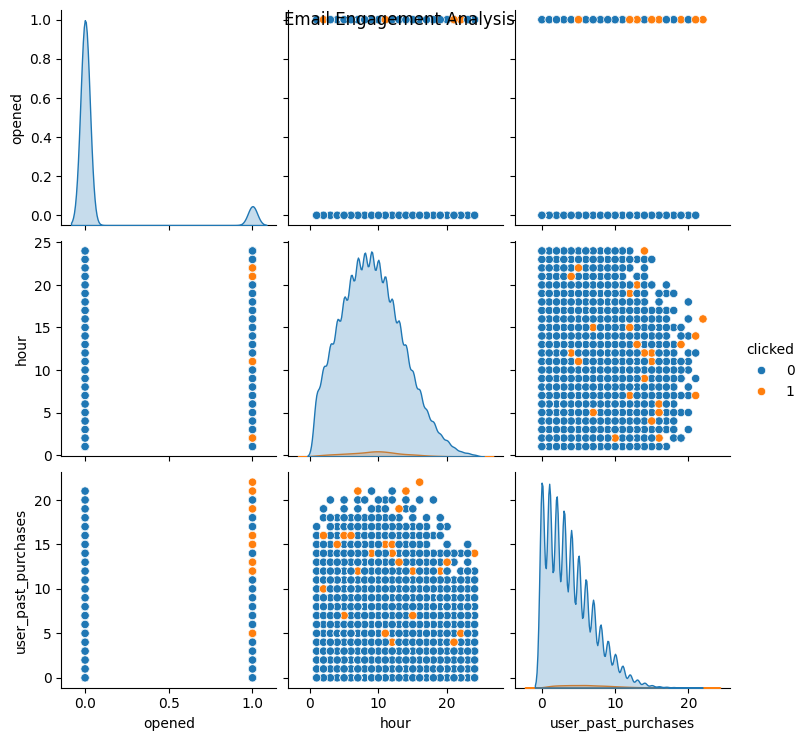

In [64]:
num_col = [ 'opened', 'clicked', 'hour' , 'user_past_purchases']
sns.pairplot(df[num_col], hue = 'clicked', diag_kind = 'kde')
plt.suptitle('Email Engagement Analysis')
plt.show()

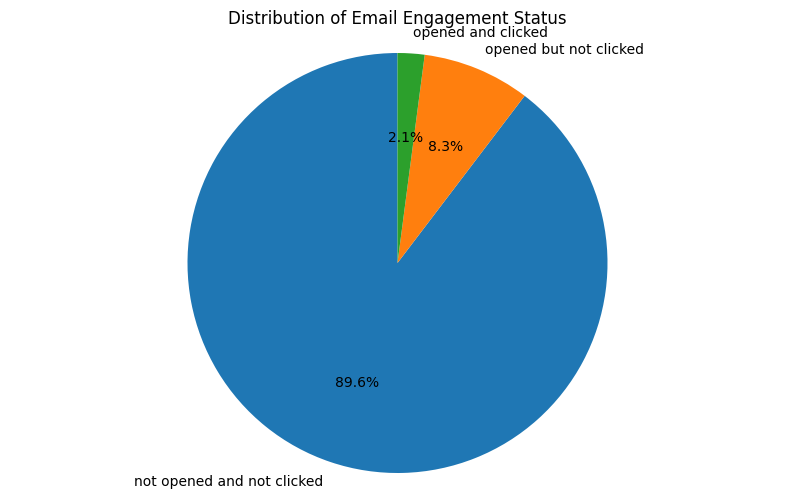

In [66]:
plt.figure(figsize=(10, 6))
engagement_counts = df['target_col'].value_counts()
plt.pie(engagement_counts.values, labels=engagement_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Email Engagement Status')
plt.axis('equal')
plt.show()

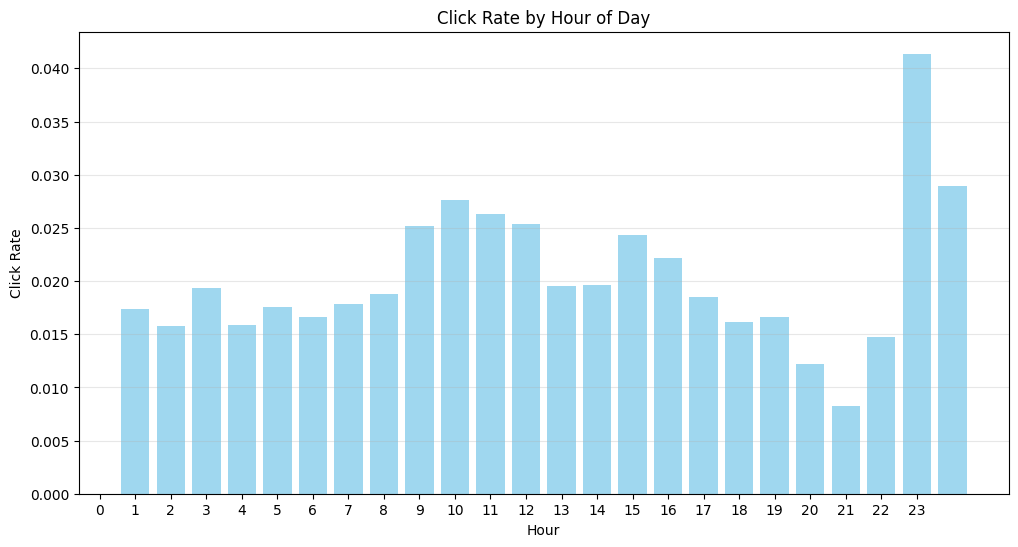

In [67]:
plt.figure(figsize=(12, 6))
hourly_click_rate = df.groupby('hour')['clicked'].mean()
plt.bar(hourly_click_rate.index, hourly_click_rate.values, color='skyblue', alpha=0.8)
plt.title('Click Rate by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Click Rate')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.show()

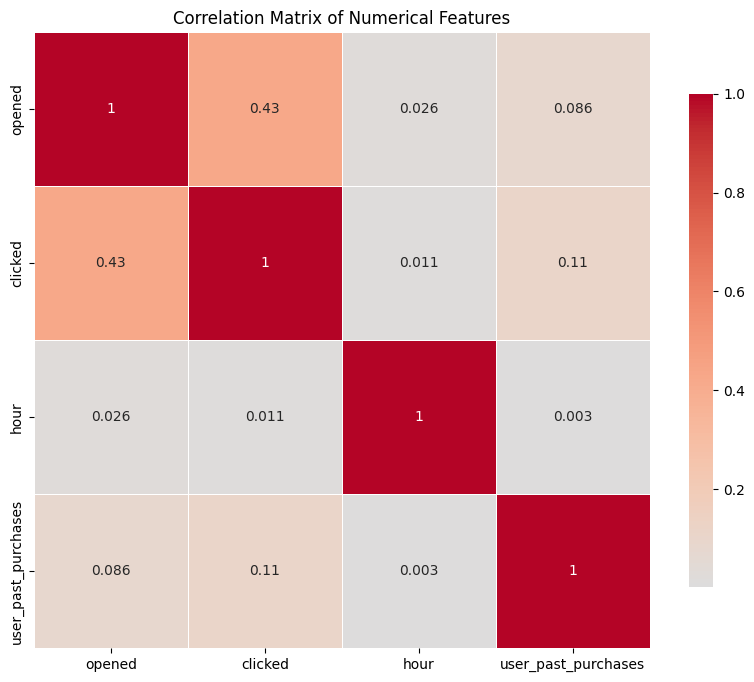

In [68]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[num_col].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features')
plt.show()

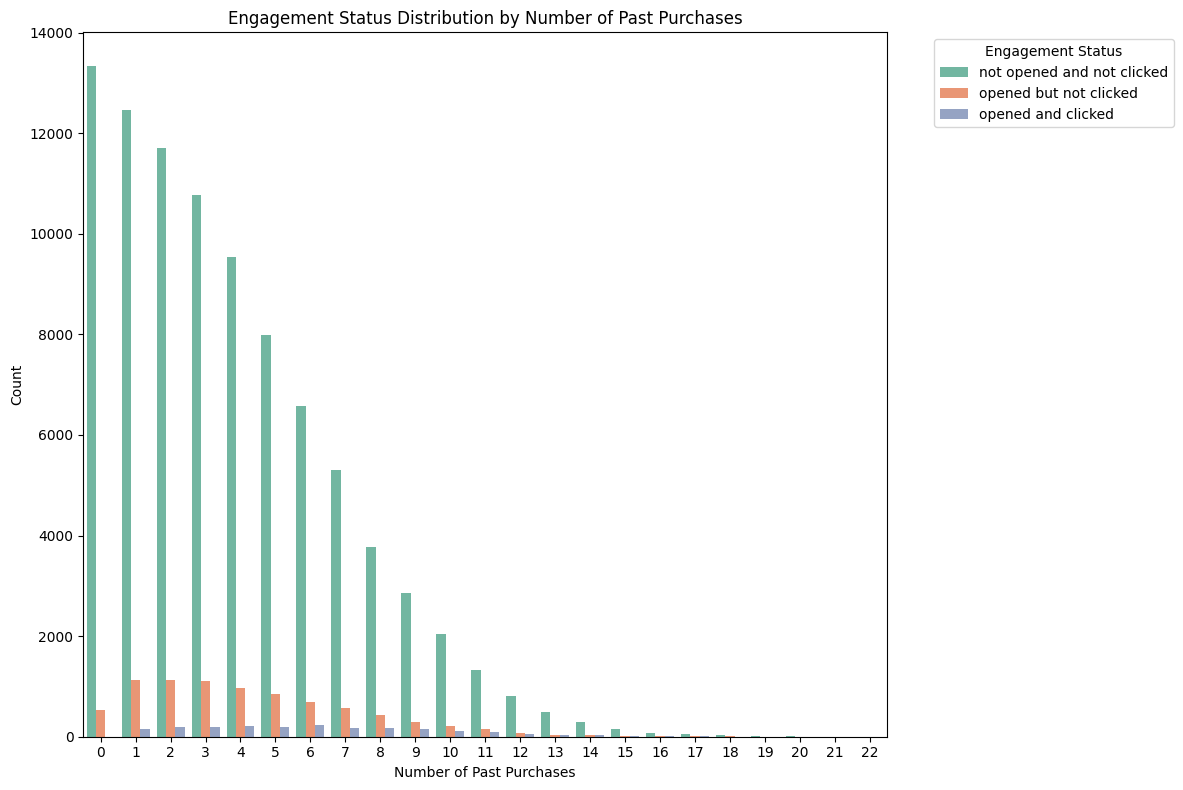

In [69]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='user_past_purchases', hue='target_col', palette='Set2')
plt.title('Engagement Status Distribution by Number of Past Purchases')
plt.xlabel('Number of Past Purchases')
plt.ylabel('Count')
plt.legend(title='Engagement Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\iaman\AppData\Local\Temp\ipykernel_16564\1088451798.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='clicked', y='user_past_purchases', palette='viridis')


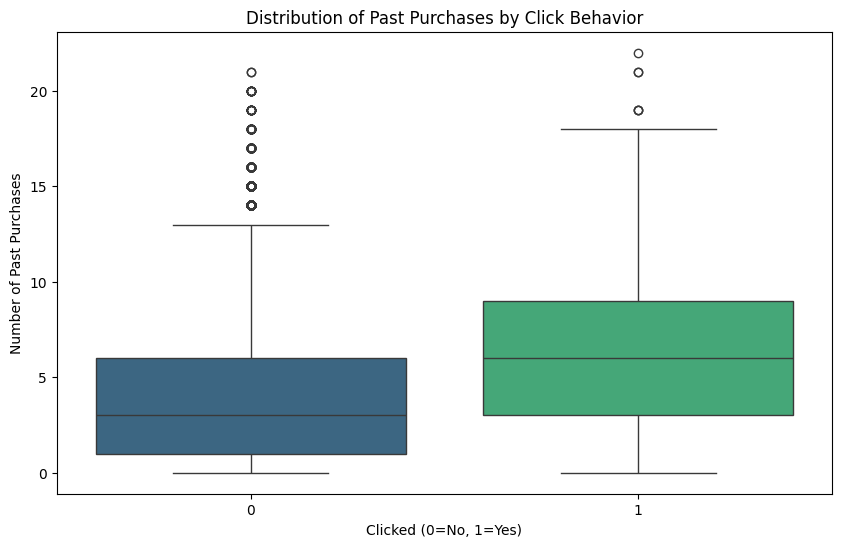

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='clicked', y='user_past_purchases', palette='viridis')
plt.title('Distribution of Past Purchases by Click Behavior')
plt.xlabel('Clicked (0=No, 1=Yes)')
plt.ylabel('Number of Past Purchases')
plt.show()

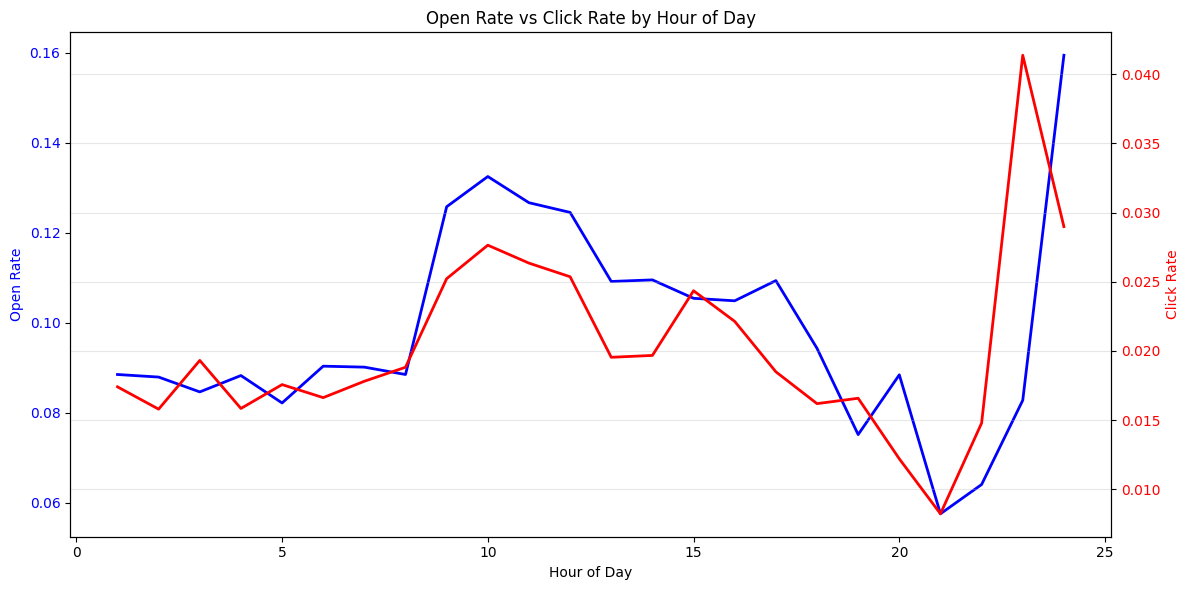

In [71]:
fig, ax1 = plt.subplots(figsize=(12, 6))
hourly_open_rate = df.groupby('hour')['opened'].mean()
hourly_click_rate = df.groupby('hour')['clicked'].mean()

ax1.plot(hourly_open_rate.index, hourly_open_rate.values, 'b-', label='Open Rate', linewidth=2)
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Open Rate', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(hourly_click_rate.index, hourly_click_rate.values, 'r-', label='Click Rate', linewidth=2)
ax2.set_ylabel('Click Rate', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Open Rate vs Click Rate by Hour of Day')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()